<a name='0'></a>
# **Prediction of Accident casuality using Regression models**


As always, we are going to approach our problem following a typical Machine Learning workflow. 

* [1. Import Libraries](#1)
* [2. Data Description](#2)
* [3. Exploring insights in data or EDA](#3)
* [4. Data preprocessing](#4)
* [5. Choosing and training a model](#5)


<a name='1'></a>

## 1. **Import Libraries**


In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

<a name='2'></a>

## 2. Data Description

This comprehensive dataset provides detailed information on road accidents reported over multiple years. The dataset encompasses various attributes related to accident status, vehicle and casualty references, demographics, and severity of casualties. It includes essential factors such as pedestrian details, casualty types, road maintenance worker involvement, and the Index of Multiple Deprivation (IMD) decile for casualties' home areas.

Columns:

* **Status:** The status of the accident (e.g., reported, under investigation).
* **Accident_Index:** A unique identifier for each reported accident.
* **Accident_Year:** The year in which the accident occurred.
* **Accident_Reference:** A reference number associated with the accident.
* **Vehicle_Reference:** A reference number for the involved vehicle in the accident.
* **Casualty_Reference:** A reference number for the casualty involved in the accident.
* **Casualty_Class:** Indicates the class of the casualty (e.g., driver, passenger, pedestrian).
* **Sex_of_Casualty:** The gender of the casualty (male or female).
* **Age_of_Casualty:** The age of the casualty.
* **Age_Band_of_Casualty:** Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).
* **Casualty_Severity:** The severity of the casualty's injuries (e.g., fatal, serious, slight).
* **Pedestrian_Location:** The location of the pedestrian at the time of the accident.
* **Pedestrian_Movement:** The movement of the pedestrian during the accident.
* **Car_Passenger:** Indicates whether the casualty was a car passenger at the time of the accident (yes or no).
* **Bus_or_Coach_Passenger:** Indicates whether the casualty was a bus or coach passenger (yes or no).
* **Pedestrian_Road_Maintenance_Worker:** Indicates whether the casualty was a road maintenance worker (yes or no).
* **Casualty_Type:** The type of casualty (e.g., driver/rider, passenger, pedestrian).
* **Casualty_Home_Area_Type:** The type of area in which the casualty resides (e.g., urban, rural).
* **Casualty_IMD_Decile:** The IMD decile of the area where the casualty resides (a measure of deprivation).
* **LSOA_of_Casualty:** The Lower Layer Super Output Area (LSOA) associated with the casualty's location.


Let's download the data. 

In [4]:
df = pd.read_csv('./df.csv')
df.head(5)

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [5]:
df = df.drop(['status', 'accident_index', 'accident_reference'], axis=1)
df

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,2022,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,2022,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,2022,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,2022,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,2022,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61348,2022,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1,-1
61349,2022,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,2022,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   accident_year                       61352 non-null  int64 
 1   vehicle_reference                   61352 non-null  int64 
 2   casualty_reference                  61352 non-null  int64 
 3   casualty_class                      61352 non-null  int64 
 4   sex_of_casualty                     61352 non-null  int64 
 5   age_of_casualty                     61352 non-null  int64 
 6   age_band_of_casualty                61352 non-null  int64 
 7   casualty_severity                   61352 non-null  int64 
 8   pedestrian_location                 61352 non-null  int64 
 9   pedestrian_movement                 61352 non-null  int64 
 10  car_passenger                       61352 non-null  int64 
 11  bus_or_coach_passenger              61352 non-null  in

<a name='3'></a>

## **3. Exploring Insights in Data or EDA**

In this part, we are going to learn more about the dataset. Let's start with the summary statistics.

#### Checking summary statistics

In [7]:
df.describe()

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.0,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000
mean,2022.0,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674
std,0.0,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496
min,2022.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2022.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2022.0,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


#### Checking missing values

In [8]:
df.isnull().sum()

accident_year                         0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

We are lucky to not have missing values.

## **Checking Correlation Between Features**

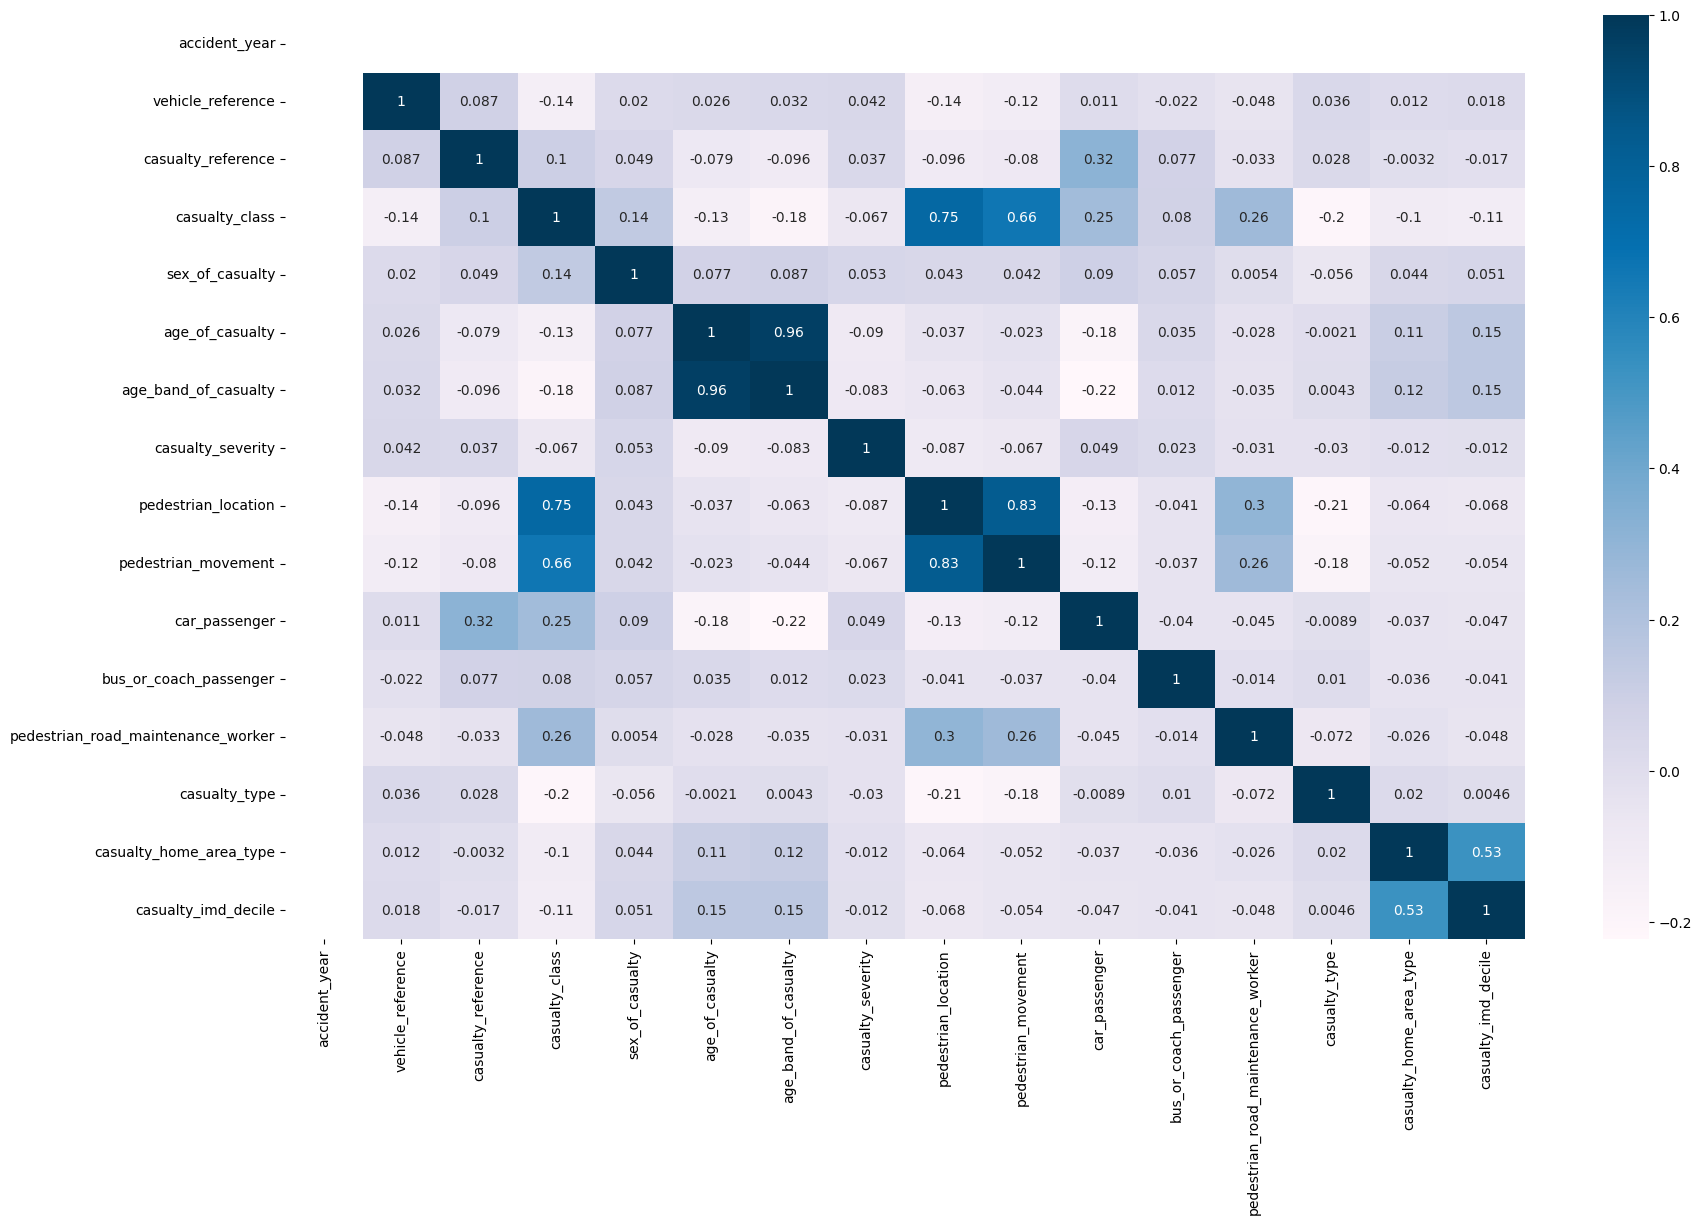

In [11]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.show()

#### There are some Negative Ages

In [12]:
negative_ages = (df['age_of_casualty'] < 0).sum()
negative_ages

1350

In [13]:
print(df['sex_of_casualty'].unique())
print('------------------------')
print(df['sex_of_casualty'].value_counts())


[ 2  1 -1  9]
------------------------
 1    37452
 2    23442
-1      448
 9       10
Name: sex_of_casualty, dtype: int64


## **Cleaning the Abnormal Data**

In [14]:
# Exclude records with negative ages or undefined gender values
cleaned_df = df[(df['age_of_casualty'] >= 1) & ((df['sex_of_casualty'] == 1) | (df['sex_of_casualty'] == 2))]
cleaned_df

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,2022,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,2022,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,2022,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,2022,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,2022,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61348,2022,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1,-1
61349,2022,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,2022,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


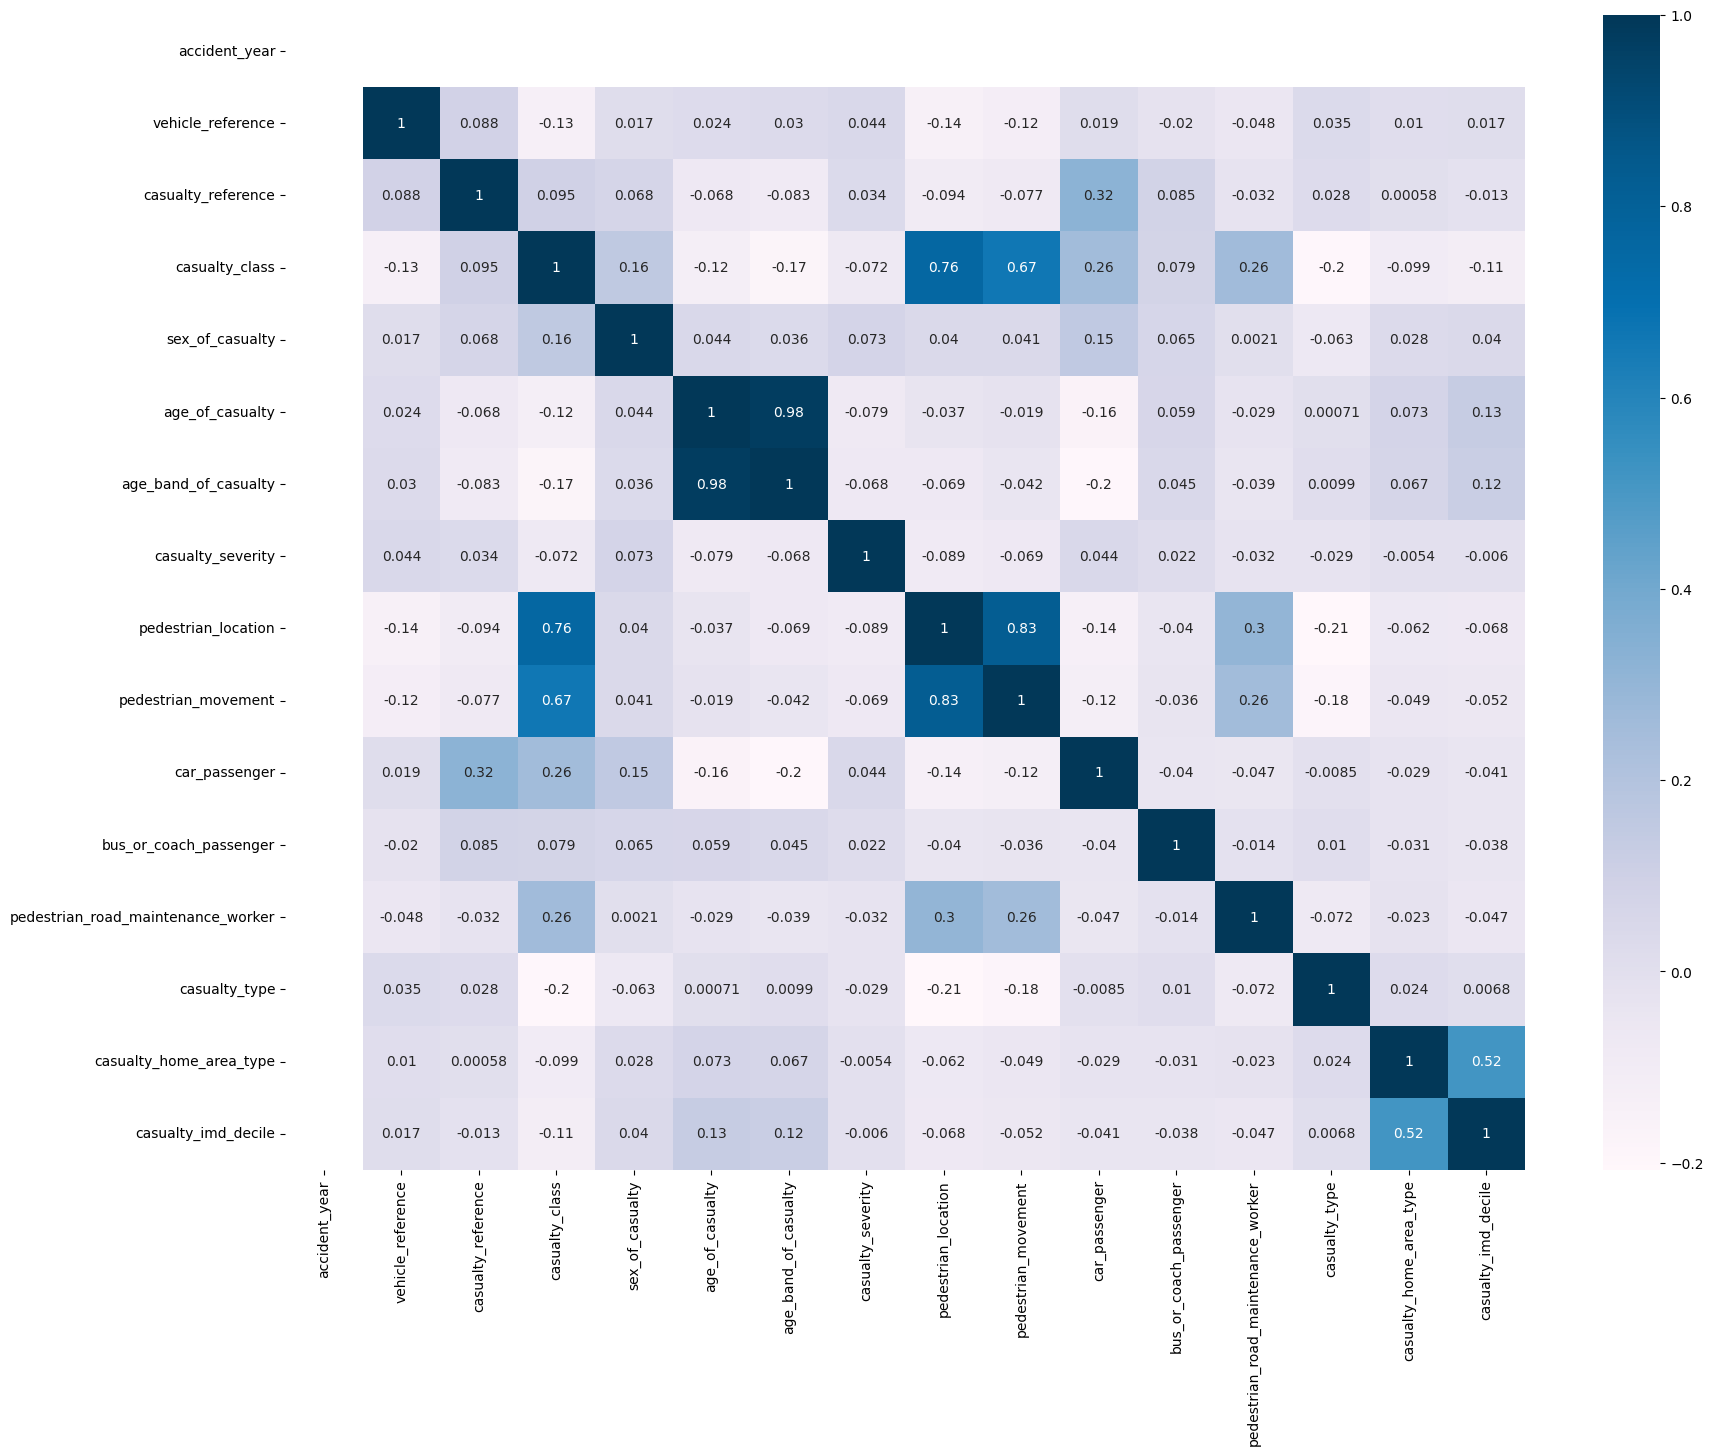

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='PuBu')
plt.show()

In [18]:
cleaned_df.age_of_casualty.value_counts().unique()

array([1595, 1517, 1427, 1400, 1383, 1355, 1352, 1350, 1330, 1310, 1301,
       1299, 1290, 1278, 1268, 1251, 1165, 1162, 1130, 1110, 1021, 1017,
        978,  967,  965,  922,  873,  861,  837,  813,  808,  784,  773,
        757,  753,  751,  748,  744,  743,  729,  721,  693,  686,  676,
        648,  619,  606,  582,  567,  560,  538,  486,  474,  466,  423,
        408,  327,  322,  310,  304,  303,  293,  290,  282,  273,  272,
        261,  254,  244,  240,  217,  202,  192,  186,  178,  159,  153,
        150,  143,  124,  115,  104,   90,   80,   69,   66,   40,   36,
         22,   15,    6,    4,    3,    2,    1], dtype=int64)

In [19]:
cleaned_df['casualty_severity'].value_counts()

3    47333
2    11618
1      786
Name: casualty_severity, dtype: int64

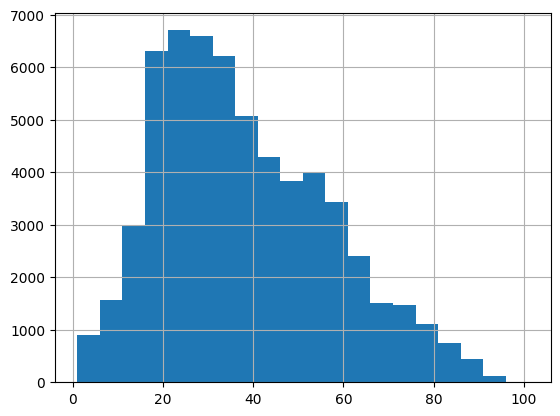

In [21]:
cleaned_df["age_of_casualty"].hist(bins=20)
plt.show()

<Axes: >

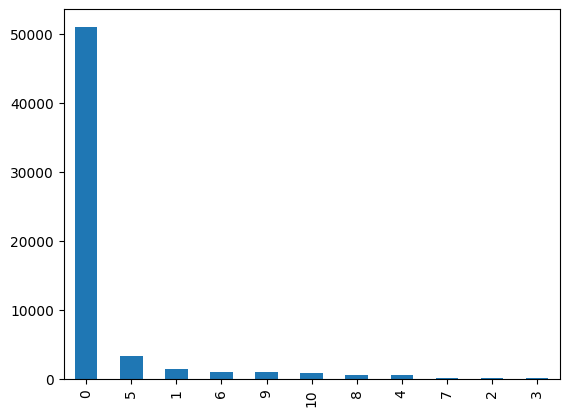

In [22]:
cleaned_df["pedestrian_location"].value_counts().plot(kind="bar")

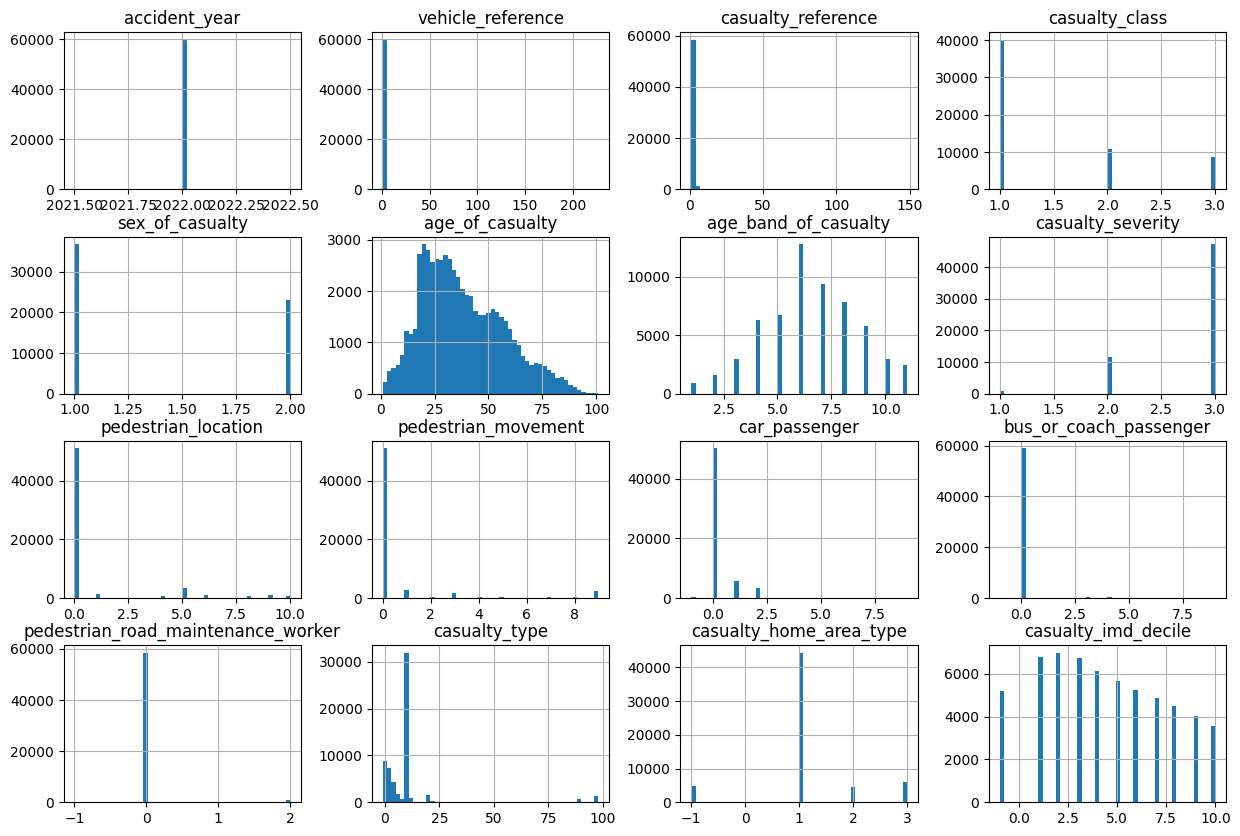

In [23]:
cleaned_df.hist(bins=50, figsize=(15,10))
plt.show()

In [25]:
cleaned_df.columns

Index(['accident_year', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

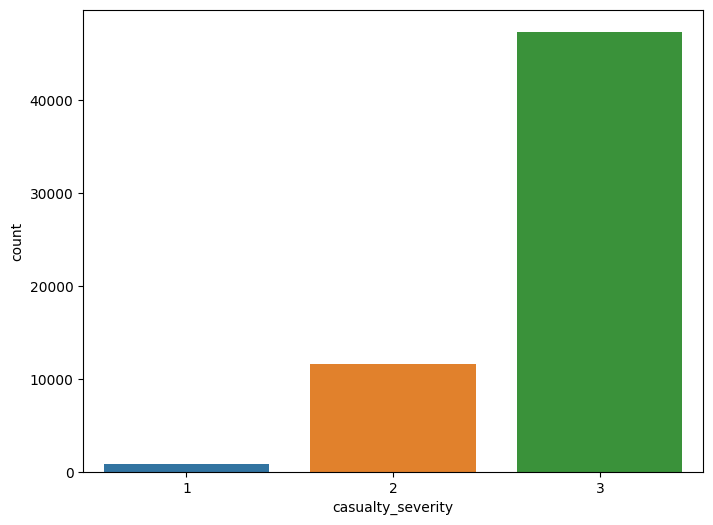

In [27]:
# Plot the distribution of accident severities
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', data=cleaned_df)
plt.show()

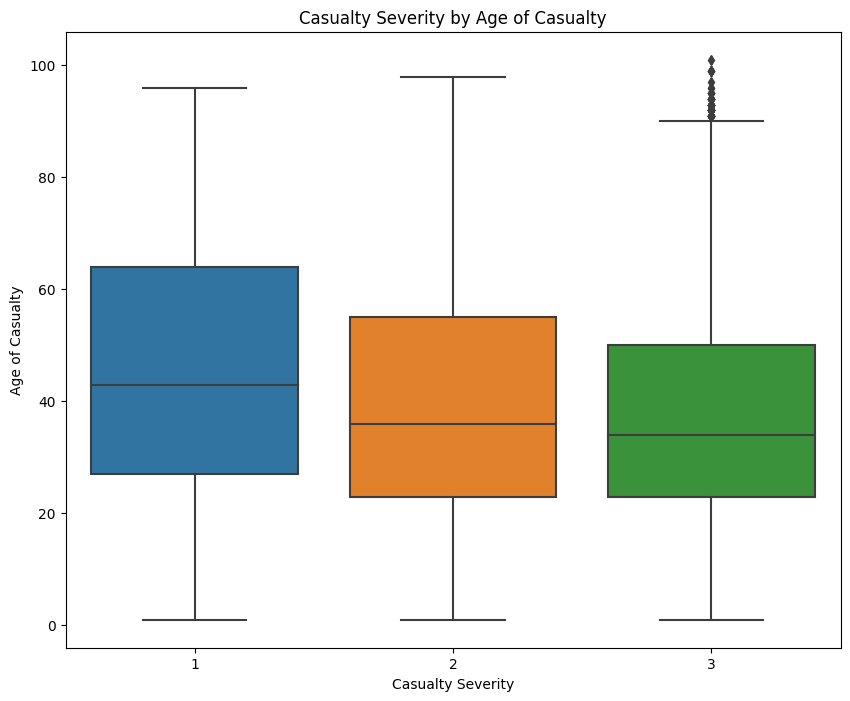

In [28]:
# Plot the relationship between casualty severity and age band
plt.figure(figsize=(10, 8))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=cleaned_df)
plt.title('Casualty Severity by Age of Casualty')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()

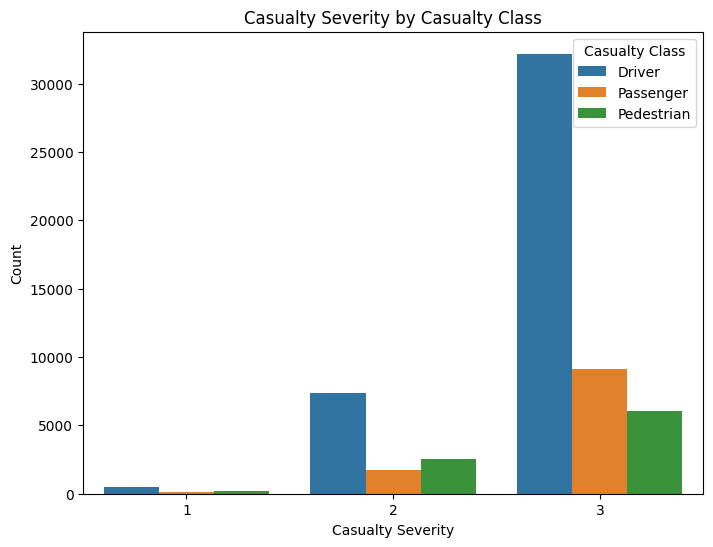

In [30]:
# Plot the relationship between casualty severity and casualty class
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_class', data=cleaned_df)
plt.title('Casualty Severity by Casualty Class')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])
plt.show()

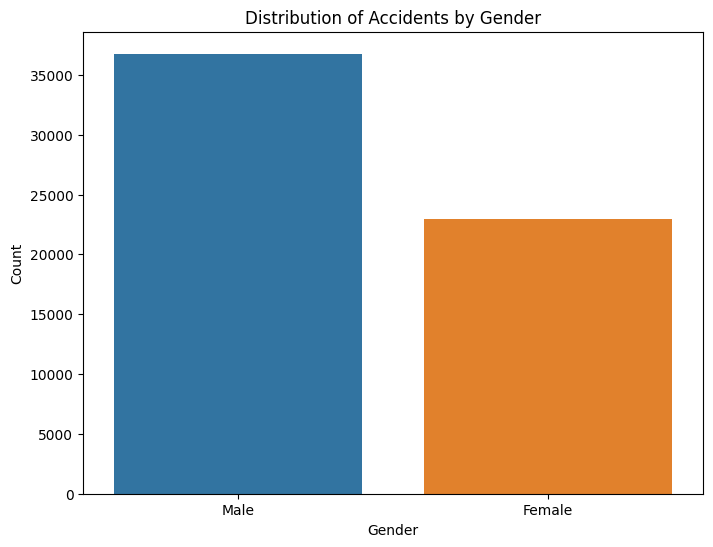

In [31]:
# Plot the distribution of accidents by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex_of_casualty', data=cleaned_df)
plt.title('Distribution of Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

In [35]:
X = cleaned_df.drop(['lsoa_of_casualty', 'casualty_severity'], axis=1)
y = cleaned_df.casualty_severity

X.info()
print()
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59737 entries, 0 to 61351
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   accident_year                       59737 non-null  int64
 1   vehicle_reference                   59737 non-null  int64
 2   casualty_reference                  59737 non-null  int64
 3   casualty_class                      59737 non-null  int64
 4   sex_of_casualty                     59737 non-null  int64
 5   age_of_casualty                     59737 non-null  int64
 6   age_band_of_casualty                59737 non-null  int64
 7   pedestrian_location                 59737 non-null  int64
 8   pedestrian_movement                 59737 non-null  int64
 9   car_passenger                       59737 non-null  int64
 10  bus_or_coach_passenger              59737 non-null  int64
 11  pedestrian_road_maintenance_worker  59737 non-null  int64
 12  casu

<a name='4'></a>

## **4. Data Preprocessing**


In [36]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47789, 15) (11948, 15) (47789,) (11948,)


In [39]:
# Standard Scaler
scale_pipe = Pipeline([
    ('scaler', StandardScaler())
    ])

X_train_scaled = scale_pipe.fit_transform(X_train)
X_test_scaled = scale_pipe.transform(X_test)

## **Choosing and training a model**

In [41]:
models = [LinearRegression(), SVR(), KNeighborsRegressor(n_neighbors=3),
          RandomForestRegressor(),
          DecisionTreeRegressor(), 
          GradientBoostingRegressor(), AdaBoostRegressor()]
          
model_names = ['LinearRegression', 'SVR', 'KNearestNeighborsRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor',
               'GradientBoostingRegressor', 'AdaBoostRegressor']

MSE = []
RMSE = []
R2 = []
d = {}

for m in range(len(models)):
    
    model = models[m]
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    MSE.append(mse)
    RMSE.append(rmse)
    R2.append(r2)

d = {'Algorithms' : model_names, 'MSE' : MSE, 'RMSE' : RMSE, "R2": R2}
metrics_frame = pd.DataFrame(d)
metrics_frame

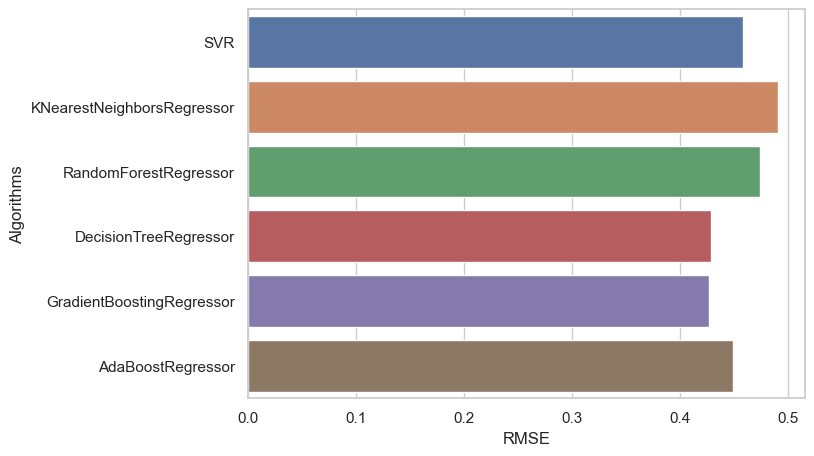

In [153]:
sns.barplot(data = metrics_frame, y = 'Algorithms', x = 'RMSE')
plt.show()

### [BACK TO TOP](#0)